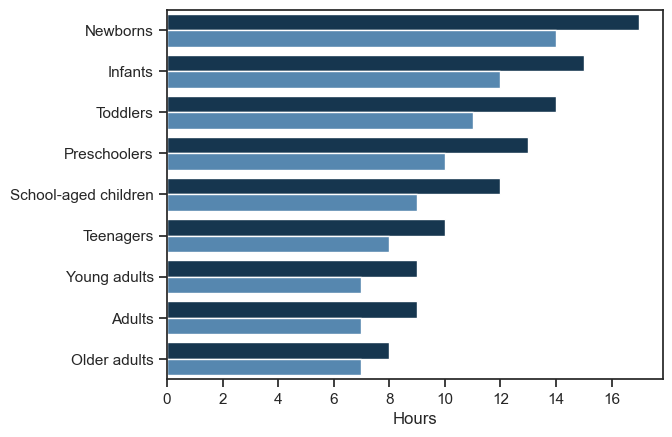

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sleep_data = pd.read_csv('sleep.csv')

sleep_data_melted = sleep_data.melt(id_vars=['Age group'], var_name='Limit', value_name='Hours')

filtered_sleep_data = sleep_data_melted[
    sleep_data_melted['Limit'].isin(['Recommended upper', 'Recommended lower'])
]

adjusted_palette = {
    'Recommended upper': "#0c3759",
    'Recommended lower': "#4789be"
}

sns.set(style="ticks")
ax = sns.barplot(
    data=filtered_sleep_data, 
    x='Hours', 
    y='Age group', 
    hue='Limit', 
    palette=adjusted_palette, 
    dodge=0.2, 
    hue_order=['Recommended upper', 'Recommended lower'])

plt.legend([],[], frameon=False)
plt.ylabel('')

plt.show()

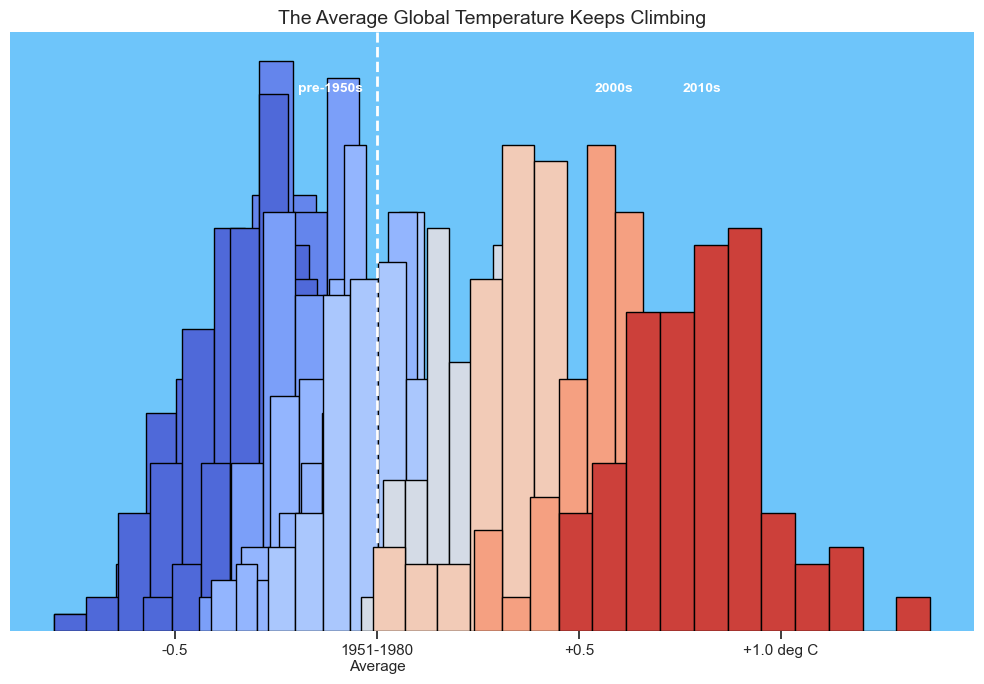

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load temperature data into a DataFrame
temps_df = pd.read_csv('temps.csv')

# Set the figure and background color
plt.figure(figsize=(10, 7))
plt.gca().set_facecolor('#6ec5fa')

# Initialize the color palette
coolwarm_palette = sns.color_palette("coolwarm", n_colors=len(decade_means))

# Create a function to normalize values between 0 and 1
def normalize(values):
    min_val = np.min(values)
    max_val = np.max(values)
    return (values - min_val) / (max_val - min_val)

# Prepare the data: reshape the dataframe to have one column for deviations and one for decades
temps_melted = temps_df.melt(id_vars='Year', var_name='Month', value_name='TempDeviation')
temps_melted['Decade'] = (temps_melted['Year'] // 10) * 10

# Calculate the normalized mean deviation for each decade
decade_means = temps_melted.groupby('Decade')['TempDeviation'].mean()
norm_means = normalize(decade_means.values)

# Create a dictionary to map decades to colors based on their normalized mean temperature deviation
decade_to_color = {
    decade: coolwarm_palette[int(norm * (len(coolwarm_palette) - 1))]
    for decade, norm in zip(decade_means.index, norm_means)
}

# Plotting the bars for each decade
for i, decade in enumerate(unique_decades):
    # Select the temperature deviations for the decade
    data = temps_melted[temps_melted['Decade'] == decade]['TempDeviation']
    # Calculate the count of data points in each bin
    counts, bins = np.histogram(data, bins=11)
    # Plot bars for each bin
    for count, left, right in zip(counts, bins[:-1], bins[1:]):
        plt.bar((left + right) / 2, count, color=decade_to_color[decade], edgecolor='black', width=right - left, zorder=i)

# Add the average line for 1951-1980
plt.axvline(x=0, color='white', linestyle='--', linewidth=2, zorder=10)

# # Add text annotations for the pre-1950s, 2000s, and 2010s
plt.text(pre_1950s_mean, plt.ylim()[1]*0.9, 'pre-1950s', ha='left', fontsize=10, color='white', zorder=11, fontweight='bold')
plt.text(_2000s_mean, plt.ylim()[1]*0.9, '2000s', ha='center', fontsize=10, color='white', zorder=11, fontweight='bold')
plt.text(_2010s_mean, plt.ylim()[1]*0.9, '2010s', ha='center', fontsize=10, color='white', zorder=11, fontweight='bold')

# Customize the tick marks for the x-axis
plt.xticks(ticks=np.arange(-0.5, 1.1, 0.5), labels=['-0.5', '1951-1980\nAverage', '+0.5', '+1.0 deg C'])

# Add title and annotations
plt.title('The Average Global Temperature Keeps Climbing', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])  # Hide y ticks

# Remove plot boundaries
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()